In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

# Decision Tree

In [3]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
scores = cross_val_score(tree_clf, iris.data, iris.target, cv=5)
print("Average Performance Accuracy of Decision Tree using 5-fold: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Performance Accuracy of Decision Tree using 5-fold: 0.95 (+/- 0.07)


# KNN

In [4]:
X = iris.data
y = iris.target
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [5]:
scores = cross_val_score(neigh, iris.data, iris.target, cv=5)
print("Average Performance Accuracy of KNN using 5-fold: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Performance Accuracy of KNN using 5-fold: 0.97 (+/- 0.04)


# Identify the Best K

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
k = []
mean = []
sd = []

for i in range(1,60): #iterate over different k values
    neigh = KNeighborsClassifier(n_neighbors= i)
    scores = cross_val_score(neigh, iris.data, iris.target, cv=5)
    k.append(i)
    mean.append(scores.mean())
    sd.append(scores.std())

k = np.array(k)
mean = np.array(mean)
sd = np.array(sd)
   

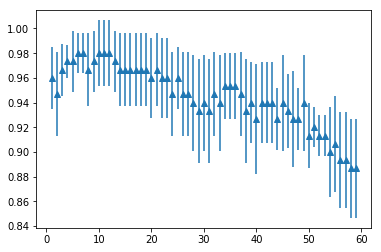

In [18]:
plt.errorbar(k, mean, sd, linestyle='None', marker='^')
plt.show()

# Compare KNN with Decision Tree

In [20]:
X = iris.data
y = iris.target
neigh = KNeighborsClassifier(n_neighbors = 11)
scores = cross_val_score(neigh, iris.data, iris.target, cv=5)
print("Average Performance Accuracy of KNN using the best k: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Performance Accuracy of KNN using the best k: 0.98 (+/- 0.05)


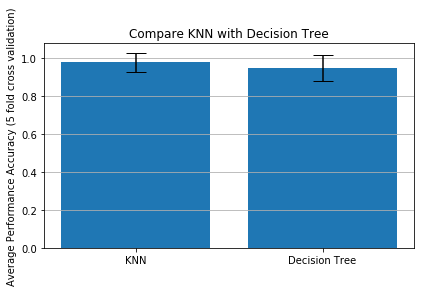

In [24]:
materials = ['KNN', 'Decision Tree']
x_pos = np.arange(len(materials))
CTEs = [.98, .95]
error = [.05, .07]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=1, ecolor='black', capsize=10)
ax.set_ylabel('Average Performance Accuracy (5 fold cross validation)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Compare KNN with Decision Tree')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()